# Import Libraries

In [70]:
# DATA MANIPULTION 
import pandas as pd 
import numpy as np

# DATA VIZ
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## PREPROCESSING
from sklearn.impute import SimpleImputer, KNNImputer
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score
## SCALERS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
## EVALUATION
from sklearn.metrics import accuracy_score, recall_score, precision_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
## MODEL TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# Load Dataset

In [3]:
df1 = pd.read_excel('8WS1_ver1.xlsx')
df1.head()

,従業員番号,離職,年齢,部署,役職,職位,性別,業績評価,勤続年数
0,1,Yes,41,Sales,Sales Executive,2,Female,3,6
1,2,No,49,Research & Development,Research Scientist,2,Male,4,10
2,4,Yes,37,Research & Development,Laboratory Technician,1,Male,3,0
3,5,No,33,Research & Development,Research Scientist,1,Female,3,8
4,7,No,27,Research & Development,Laboratory Technician,1,Male,3,2


# Preliminary Data Analysis

In [4]:
df1.shape

(1470, 9)

In [5]:
df1.columns

Index(['従業員番号', '離職', '年齢', '部署', '役職', '職位', '性別', '業績評価', '勤続年数'], dtype='object')

In [6]:
df1.dtypes

従業員番号     int64
離職       object
年齢        int64
部署       object
役職       object
職位        int64
性別       object
業績評価      int64
勤続年数      int64
dtype: object

In [7]:
df1.isnull().sum()

従業員番号    0
離職       0
年齢       0
部署       0
役職       0
職位       0
性別       0
業績評価     0
勤続年数     0
dtype: int64

In [8]:
df1.duplicated().sum()

0

In [9]:
df1.describe()

,従業員番号,年齢,職位,業績評価,勤続年数
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,2.063946,3.153741,7.008163
std,602.024335,9.135373,1.106940,0.360824,6.126525
min,1.000000,18.000000,1.000000,3.000000,0.000000
25%,491.250000,30.000000,1.000000,3.000000,3.000000
50%,1020.500000,36.000000,2.000000,3.000000,5.000000
75%,1555.750000,43.000000,3.000000,3.000000,9.000000
max,2068.000000,60.000000,5.000000,4.000000,40.000000


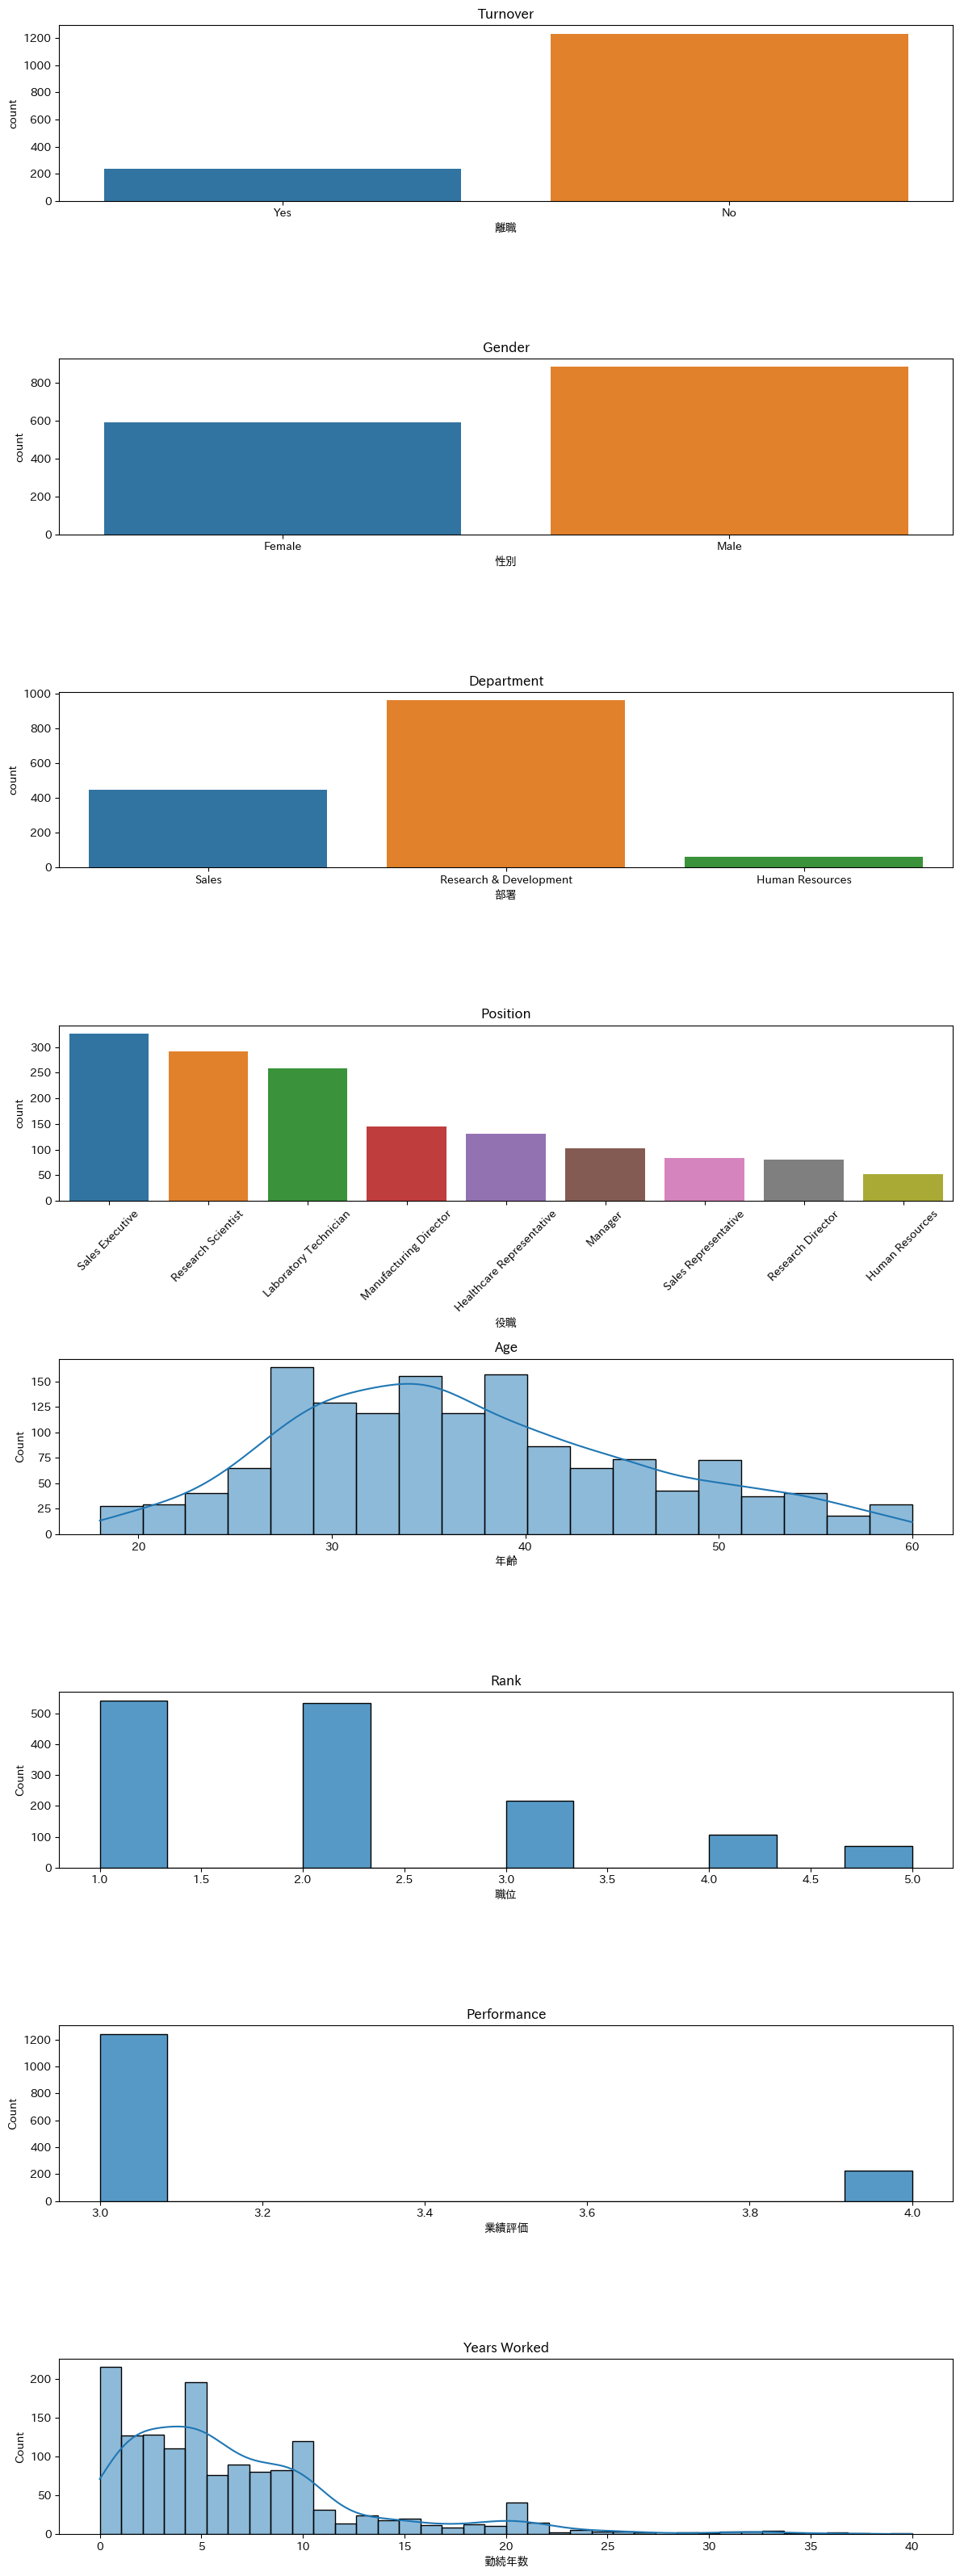

In [82]:
fig, ax = plt.subplots(8, figsize=(12, 32))
# plt.subplots_adjust(hspace=0.5)

ax[0].set_title('Turnover')
sns.countplot(data=df1, x='離職', ax=ax[0])

ax[1].set_title('Gender')
sns.countplot(data=df1, x='性別', ax=ax[1])

ax[2].set_title('Department')
sns.countplot(data=df1, x='部署', ax=ax[2])

ax[3].set_title('Position')
ax[3].tick_params(axis='x', labelrotation=45)
sns.countplot(data=df1, x='役職', ax=ax[3])

ax[4].set_title('Age')
sns.histplot(data=df1, x='年齢', kde=True, ax=ax[4])

ax[5].set_title('Rank')
sns.histplot(data=df1, x='職位', ax=ax[5])

ax[6].set_title('Performance')
sns.histplot(data=df1, x='業績評価', ax=ax[6])

ax[7].set_title('Years Worked')
sns.histplot(data=df1, x='勤続年数', kde=True, ax=ax[7])

plt.tight_layout()
plt.show();


In [11]:
df1['業績評価'].value_counts()

3    1244
4     226
Name: 業績評価, dtype: int64

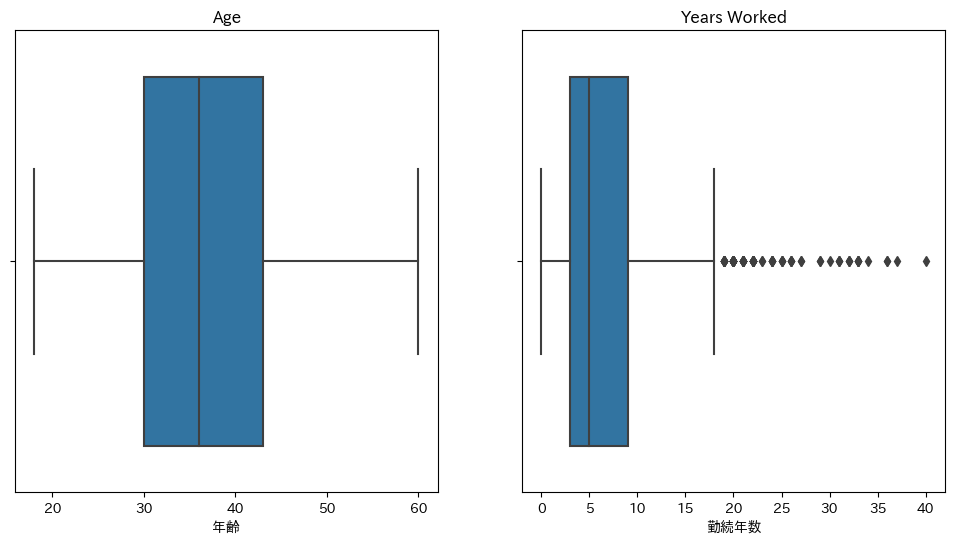

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].set_title('Age')
sns.boxplot(data=df1, x='年齢', ax=ax[0])

ax[1].set_title('Years Worked')
sns.boxplot(data=df1, x='勤続年数', ax=ax[1])

plt.tight_layout
plt.show();

In [14]:
# Calculate the IQR for the 勤続年数 column
Q1 = df1['勤続年数'].quantile(0.25)
Q3 = df1['勤続年数'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the 勤続年数 column
outliers = df1[(df1['勤続年数'] < (Q1 - 1.5 * IQR)) | (df1['勤続年数'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the 勤続年数 column:", len(outliers))
print("Ratio of outliers to total values:", len(outliers)/len(df1))

Number of outliers in the 勤続年数 column: 104
Ratio of outliers to total values: 0.0707482993197279


# Encoding Categorical Values

In [15]:
features_ohe = ['離職', '部署', '役職', '性別']

In [16]:
ohe = OneHotEncoder(drop = "if_binary",
                    sparse_output = False,
                    handle_unknown = "ignore")

cat_encoded = pd.DataFrame(ohe.fit_transform(df1[features_ohe]),
             columns= ohe.get_feature_names_out())

cat_encoded.head(3)

,離職_Yes,部署_Human Resources,部署_Research & Development,部署_Sales,役職_Healthcare Representative,役職_Human Resources,役職_Laboratory Technician,役職_Manager,役職_Manufacturing Director,役職_Research Director,役職_Research Scientist,役職_Sales Executive,役職_Sales Representative,性別_Male
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
cat_encoded.shape

(1470, 14)

In [18]:
df_encoded = pd.concat([df1, cat_encoded], axis = 1)
df_encoded.head(3)

,従業員番号,離職,年齢,部署,役職,職位,性別,業績評価,勤続年数,離職_Yes,...,役職_Healthcare Representative,役職_Human Resources,役職_Laboratory Technician,役職_Manager,役職_Manufacturing Director,役職_Research Director,役職_Research Scientist,役職_Sales Executive,役職_Sales Representative,性別_Male
0,1,Yes,41,Sales,Sales Executive,2,Female,3,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,No,49,Research & Development,Research Scientist,2,Male,4,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,4,Yes,37,Research & Development,Laboratory Technician,1,Male,3,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
df_encoded.columns

Index(['従業員番号', '離職', '年齢', '部署', '役職', '職位', '性別', '業績評価', '勤続年数', '離職_Yes',
       '部署_Human Resources', '部署_Research & Development', '部署_Sales',
       '役職_Healthcare Representative', '役職_Human Resources',
       '役職_Laboratory Technician', '役職_Manager', '役職_Manufacturing Director',
       '役職_Research Director', '役職_Research Scientist', '役職_Sales Executive',
       '役職_Sales Representative', '性別_Male'],
      dtype='object')

In [20]:
df_best_features = df_encoded[['年齢', '職位', '業績評価', '勤続年数', '離職_Yes',
       '部署_Human Resources', '部署_Research & Development', '部署_Sales',
       '役職_Healthcare Representative', '役職_Human Resources',
       '役職_Laboratory Technician', '役職_Manager', '役職_Manufacturing Director',
       '役職_Research Director', '役職_Research Scientist', '役職_Sales Executive',
       '役職_Sales Representative', '性別_Male']]

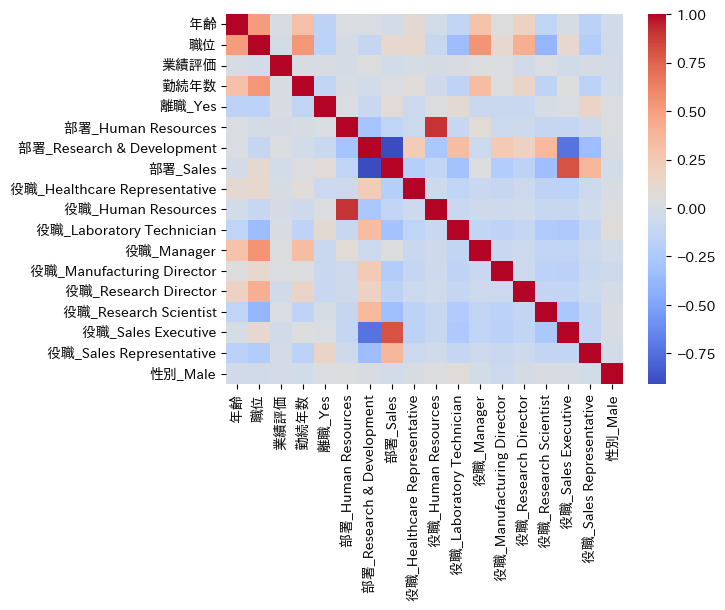

In [21]:
sns.heatmap(df_best_features.corr(), cmap='coolwarm');

# Define Features and Target

In [22]:
X = df_best_features.drop(columns= ['離職_Yes'])
y = df_best_features['離職_Yes']

# Split into Train and Test Sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 17), (294, 17), (1176,), (294,))

# Scaling Numeric Features

In [24]:
X_train_num_norm = X_train[['年齢', '職位', '業績評価']]
X_train_num_outliers = X_train[['勤続年数']]

X_test_num_norm = X_test[['年齢', '職位', '業績評価']]
X_test_num_outliers = X_test[['勤続年数']]

In [25]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train_num_outliers)
X_train['勤続年数'] = robust_scaler.transform(X_train_num_outliers)

X_train.head()

,年齢,職位,業績評価,勤続年数,部署_Human Resources,部署_Research & Development,部署_Sales,役職_Healthcare Representative,役職_Human Resources,役職_Laboratory Technician,役職_Manager,役職_Manufacturing Director,役職_Research Director,役職_Research Scientist,役職_Sales Executive,役職_Sales Representative,性別_Male
1046,44,1,3,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1359,34,2,3,-0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76,35,2,3,1.428571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
528,50,2,3,-0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
418,26,1,4,-0.285714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
X_test['勤続年数'] = robust_scaler.transform(X_test_num_outliers)
X_test.head()

,年齢,職位,業績評価,勤続年数,部署_Human Resources,部署_Research & Development,部署_Sales,役職_Healthcare Representative,役職_Human Resources,役職_Laboratory Technician,役職_Manager,役職_Manufacturing Director,役職_Research Director,役職_Research Scientist,役職_Sales Executive,役職_Sales Representative,性別_Male
624,53,3,3,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1036,31,1,3,-0.428571,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254,29,2,3,-0.285714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
926,43,3,3,2.285714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42,26,1,3,-0.571429,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
s_scaler = StandardScaler()
s_scaler.fit(X_train_num_norm)
X_train[['年齢', '職位', '業績評価']] = s_scaler.transform(X_train_num_norm)
X_train.head()

,年齢,職位,業績評価,勤続年数,部署_Human Resources,部署_Research & Development,部署_Sales,役職_Healthcare Representative,役職_Human Resources,役職_Laboratory Technician,役職_Manager,役職_Manufacturing Director,役職_Research Director,役職_Research Scientist,役職_Sales Executive,役職_Sales Representative,性別_Male
1046,0.761669,-0.975573,-0.433450,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1359,-0.330676,-0.072919,-0.433450,-0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76,-0.221441,-0.072919,-0.433450,1.428571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
528,1.417076,-0.072919,-0.433450,-0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
418,-1.204551,-0.975573,2.307072,-0.285714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
X_test[['年齢', '職位', '業績評価']] = s_scaler.transform(X_test_num_norm)
X_test.head()

,年齢,職位,業績評価,勤続年数,部署_Human Resources,部署_Research & Development,部署_Sales,役職_Healthcare Representative,役職_Human Resources,役職_Laboratory Technician,役職_Manager,役職_Manufacturing Director,役職_Research Director,役職_Research Scientist,役職_Sales Executive,役職_Sales Representative,性別_Male
624,1.744779,0.829736,-0.43345,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1036,-0.658379,-0.975573,-0.43345,-0.428571,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254,-0.876848,-0.072919,-0.43345,-0.285714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
926,0.652434,0.829736,-0.43345,2.285714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42,-1.204551,-0.975573,-0.43345,-0.571429,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Baseline Model - Most Frequent

In [29]:
y_train.value_counts()

0.0    991
1.0    185
Name: 離職_Yes, dtype: int64

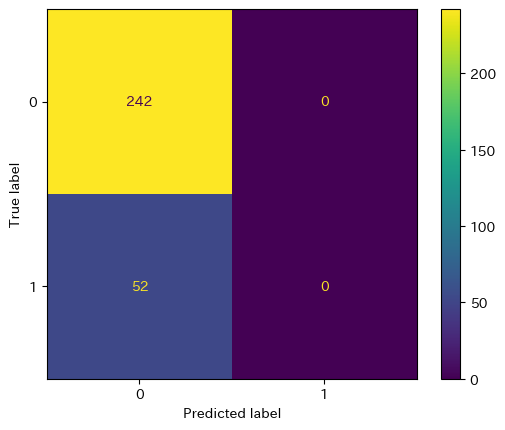

In [30]:
y_pred_baseline = pd.Series([0]*len(y_test))

cm = confusion_matrix(y_test, y_pred_baseline, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [31]:
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       242
         1.0       0.00      0.00      0.00        52

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.82      0.74       294



/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

# Logistic Regression

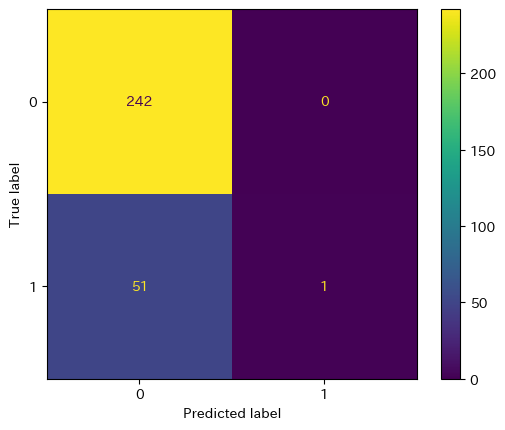

In [32]:
logreg = LogisticRegression(max_iter = 1_000,  # LBFGS Convergence
                            penalty = "l2")    # Default penalty

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred_logreg, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [33]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.90       242
         1.0       1.00      0.02      0.04        52

    accuracy                           0.83       294
   macro avg       0.91      0.51      0.47       294
weighted avg       0.86      0.83      0.75       294



In [34]:
y_test.value_counts()

0.0    242
1.0     52
Name: 離職_Yes, dtype: int64

# Model Tuning

## Multicolinearity and Feature Permutation

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [36]:
vif_df = pd.DataFrame()

vif_df["features"] = X_train.columns

vif_df["vif_index"] = [vif(X_train.values, i) for i in range(X_train.shape[1])]

round(vif_df.sort_values(by="vif_index", ascending = False),2)

/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_index
8,役職_Human Resources,inf
14,役職_Sales Executive,inf
15,役職_Sales Representative,inf
4,部署_Human Resources,inf
5,部署_Research & Development,inf
6,部署_Sales,inf
7,役職_Healthcare Representative,inf
9,役職_Laboratory Technician,inf
10,役職_Manager,inf
11,役職_Manufacturing Director,inf


In [38]:
from sklearn.inspection import permutation_importance

# Fit model
model = LogisticRegression().fit(X_train, y_train) 

# Performs Permutation
permutation_score = permutation_importance(model, X_test, y_test, 
                                           scoring='accuracy',
                                          random_state=22) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_test.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
15,役職_Sales Representative,0.007483
0,年齢,0.003401
3,勤続年数,0.003401
5,部署_Research & Development,0.003401
6,部署_Sales,0.003401
1,職位,0.002041
13,役職_Research Scientist,0.002041
2,業績評価,0.001361
10,役職_Manager,0.001361
14,役職_Sales Executive,0.001361


## PCA

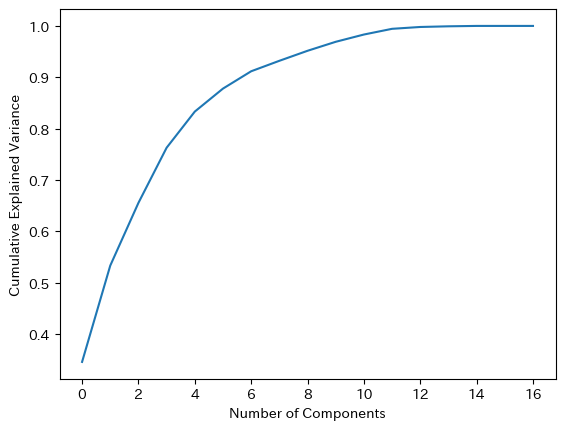

In [40]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [43]:
# Initialize the PCA model
pca = PCA(n_components=9)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

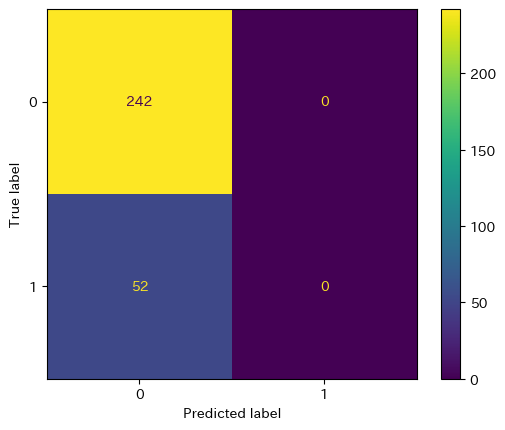

In [44]:
pca_logreg = LogisticRegression(max_iter = 1_000,  # LBFGS Convergence
                            penalty = "l2")    # Default penalty

pca_logreg.fit(X_train_pca, y_train)

y_pred_pca_logreg = pca_logreg.predict(X_test_pca)

cm = confusion_matrix(y_test, y_pred_pca_logreg, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [45]:
print(classification_report(y_test, y_pred_pca_logreg))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       242
         1.0       0.00      0.00      0.00        52

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.82      0.74       294



/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

## SMOTE - class balancing

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [48]:
smote_logreg = LogisticRegression(max_iter = 1_000, penalty = "l2")
smote_logreg.fit(X_train_resampled, y_train_resampled)

smote_logreg.score(X_test, y_test)

0.5510204081632653

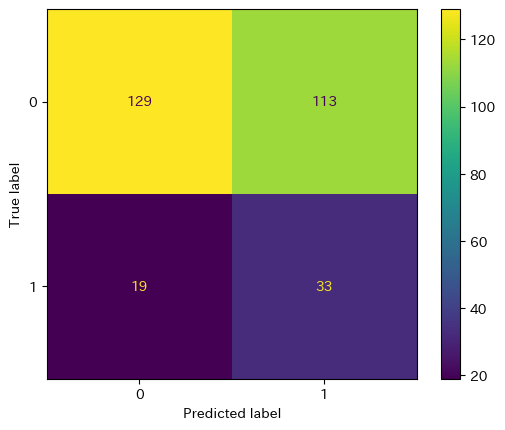

In [49]:
y_pred_smote = smote_logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred_smote, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [50]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

         0.0       0.87      0.53      0.66       242
         1.0       0.23      0.63      0.33        52

    accuracy                           0.55       294
   macro avg       0.55      0.58      0.50       294
weighted avg       0.76      0.55      0.60       294



## Threshold Adjustment

In [55]:
targeted_recall = 0.5

# Predict probabilities
y_pred_probas_0, y_pred_probas_1 = cross_val_predict(LogisticRegression(max_iter = 1_000),
                                                     X_train, y_train,
                                                     method = "predict_proba").T

# Generate precision and thresholds (and recalls) using probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_probas_1)

# Populate dataframe with precision and threshold
df_recall = pd.DataFrame({"recall" : recall[1:],
                          "threshold" : thresholds})

# New Threshold
new_threshold = df_recall[df_recall.recall > targeted_recall]["threshold"].max()
new_threshold

0.2088165157228593

In [56]:
# New predictions
y_pred_logreg_probas = logreg.predict_proba(X_test)

y_new_pred = y_pred_logreg_probas[:,1] > new_threshold

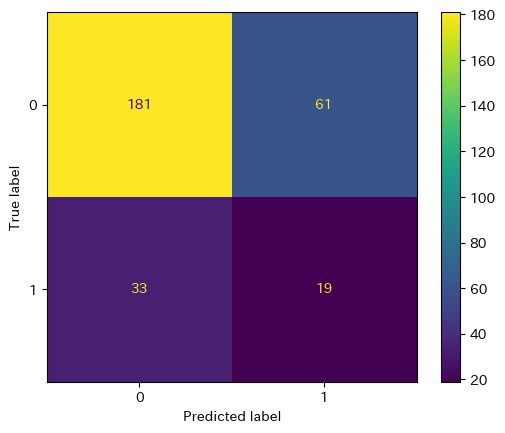

In [57]:
cm = confusion_matrix(y_test, y_new_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [58]:
print(classification_report(y_test, y_new_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.75      0.79       242
         1.0       0.24      0.37      0.29        52

    accuracy                           0.68       294
   macro avg       0.54      0.56      0.54       294
weighted avg       0.74      0.68      0.70       294



# Advanced Models

In [62]:
# List of models to try
models = [LogisticRegression(),
          SVC(kernel='linear'),
          SVC(kernel='poly', degree=2),
          SVC(kernel='poly', degree=3),
          SVC(kernel='rbf'),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier()]

# List of model names
models_names = ["logistic_regression",
               "SVC_linear",
               "SVC_poly_two",
               "SVC_poly_three",
               "SVC_rbf",
               "kneighbors_classifier",
               "decision_tree_classifier",
               "random_forest_classifier",
               "ada_boost_classifier",
               "gradient_boosting_classifier"]

In [68]:
accuracy_scores = []
precision_scores = []
recall_scores = []

for model_name, model in zip(models_names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

scores_df = pd.DataFrame({
    'model_name': models_names,
    'accuracy': accuracy_scores,
    'precision': precision_scores,
    'recall': recall_scores
})

scores_df = scores_df.sort_values(by=['accuracy', 'recall'], ascending=False)
scores_df = scores_df.round(2)

print(scores_df)

                     model_name  accuracy  precision  recall
8          ada_boost_classifier      0.83       0.62    0.15
0           logistic_regression      0.83       1.00    0.02
3                SVC_poly_three      0.82       0.50    0.04
1                    SVC_linear      0.82       0.00    0.00
2                  SVC_poly_two      0.82       0.00    0.00
4                       SVC_rbf      0.82       0.00    0.00
9  gradient_boosting_classifier      0.81       0.33    0.10
5         kneighbors_classifier      0.78       0.25    0.12
7      random_forest_classifier      0.78       0.25    0.12
6      decision_tree_classifier      0.72       0.17    0.15


# Fine Tuning ADA Boost Classifier

In [78]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of estimators (weak learners)
    'learning_rate': [0.1, 0.5, 1.0]     # Learning rate
}

# Create an AdaBoost classifier
base_classifier = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_classifier)

# Define the scoring metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Recall': make_scorer(recall_score, average='binary')
}

# Perform GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid, scoring=scoring, refit='Recall', cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and results
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)
print("Best Accuracy Score:", grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_])

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best Recall Score: 0.18378378378378382
Best Accuracy Score: 0.8494807068157231


In [79]:
best_booster = grid_search.best_estimator_
best_booster

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

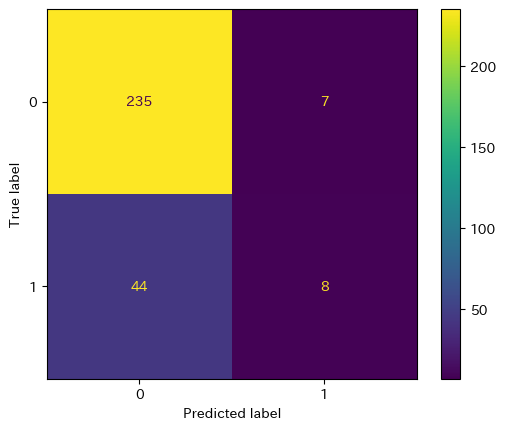

In [80]:
y_pred_best_booster = best_booster.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best_booster, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [81]:
print(classification_report(y_test, y_pred_best_booster))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       242
         1.0       0.53      0.15      0.24        52

    accuracy                           0.83       294
   macro avg       0.69      0.56      0.57       294
weighted avg       0.79      0.83      0.78       294



# Thoughts

- based on the correlation coefficients, it is possible to generalize that younger employees, employees of higher rank, and those who have worked for a long time are less likely to quit. Also it looks as though sales representatives are more likely to quit than other positions.

- The classification models above were not able to accurately predict more than 15% of employees who quit.
- Issues faced are an imbalanced dataset, and lack of variance explained by the current features.

# Next Steps

- It may be worth analyzing whether there are similarities among the subset of long-time employees who haven't quit.